In [320]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.optimize import minimize
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [279]:
# R_f general
a, b, g = sp.symbols('alpha beta gamma')

A_expr = a * (sp.exp(-b) / (a*(1-sp.exp(-b))) + 2 - a + ((2-a)/(1-a)) + ((((1-a)**2)*g)/a) + (a**2/((1-2*a)*(1-a))))
H_expr = (1-a) / (a*(1-sp.exp(-b))) + ((1-a)**2)*(2-g) + a*(1-a)

R_f = A_expr / (A_expr + H_expr)

simplified_Rf = sp.simplify(R_f)
simplified_Rf

alpha*(2*alpha**3*gamma*exp(beta) - 2*alpha**3*gamma - 2*alpha**3*exp(beta) + 2*alpha**3 - 5*alpha**2*gamma*exp(beta) + 5*alpha**2*gamma + 8*alpha**2*exp(beta) - 8*alpha**2 + 4*alpha*gamma*exp(beta) - 4*alpha*gamma - 4*alpha*exp(beta) + 6*alpha - gamma*exp(beta) + gamma - 1)/(alpha**3*exp(beta) - alpha**3 + alpha**2*exp(beta) - alpha**2 + alpha*exp(beta) + alpha - exp(beta))

In [281]:
# R_e general
expr1 = (1 + b * ((1-a)**2)*(1-g)) / (sp.exp(b)-1) + 5*a + ((1-a)**2)*g + 2*(a**2)/(1-2*a) - 2*(a**2)
expr2 = (a*(1-2*a)*(1-sp.exp(-b))) / (1-2*sp.exp(-b)*a-3*(1-sp.exp(-b))*(a**2))

R_e = expr1 * expr2
simplified_Re = sp.simplify(R_e)
simplified_Re

alpha*(2*alpha**2*(1 - exp(beta)) - (1 - exp(beta))*(2*alpha - 1)*(-2*alpha**2 + 5*alpha + gamma*(alpha - 1)**2) + (2*alpha - 1)*(-beta*(alpha - 1)**2*(gamma - 1) + 1))/(-3*alpha**2*(1 - exp(beta)) + 2*alpha - exp(beta))

In [321]:
simplified_Re.evalf(subs={a:0.25, g:0.5})

0.25*(-0.140625*beta - 0.828125*exp(beta) + 0.328125)/(0.3125 - 0.8125*exp(beta))

In [340]:
partialB = sp.diff(simplified_Re, b)
partialB

alpha*(-3*alpha**2*exp(beta) + exp(beta))*(2*alpha**2*(1 - exp(beta)) - (1 - exp(beta))*(2*alpha - 1)*(-2*alpha**2 + 5*alpha + gamma*(alpha - 1)**2) + (2*alpha - 1)*(-beta*(alpha - 1)**2*(gamma - 1) + 1))/(-3*alpha**2*(1 - exp(beta)) + 2*alpha - exp(beta))**2 + alpha*(-2*alpha**2*exp(beta) - (alpha - 1)**2*(2*alpha - 1)*(gamma - 1) + (2*alpha - 1)*(-2*alpha**2 + 5*alpha + gamma*(alpha - 1)**2)*exp(beta))/(-3*alpha**2*(1 - exp(beta)) + 2*alpha - exp(beta))

In [341]:
sp.solve(partialB, b)

KeyboardInterrupt: 

In [333]:
minimize(sp.lambdify(b, -simplified_Re.evalf(subs={a:0.25, g:0.5})), 0.5).x[0]

0.9141997846993057

In [303]:
print_latex(simplified_Re)

\frac{\alpha \left(2 \alpha^{2} \cdot \left(1 - e^{\beta}\right) - \left(1 - e^{\beta}\right) \left(2 \alpha - 1\right) \left(- 2 \alpha^{2} + 5 \alpha + \gamma \left(\alpha - 1\right)^{2}\right) + \left(2 \alpha - 1\right) \left(- \beta \left(\alpha - 1\right)^{2} \left(\gamma - 1\right) + 1\right)\right)}{- 3 \alpha^{2} \cdot \left(1 - e^{\beta}\right) + 2 \alpha - e^{\beta}}


In [305]:
l = sp.symbols('lambda')
R_t = (simplified_Rf + l * simplified_Re) / (l + 1)
simplified_Rt = sp.simplify(R_t)
simplified_Rt

alpha*(-lambda*(2*alpha**2*(1 - exp(beta)) - (1 - exp(beta))*(2*alpha - 1)*(-2*alpha**2 + 5*alpha + gamma*(alpha - 1)**2) - (2*alpha - 1)*(beta*(alpha - 1)**2*(gamma - 1) - 1))*(alpha**3*exp(beta) - alpha**3 + alpha**2*exp(beta) - alpha**2 + alpha*exp(beta) + alpha - exp(beta)) - (3*alpha**2*(1 - exp(beta)) - 2*alpha + exp(beta))*(-2*alpha**3*gamma*exp(beta) + 2*alpha**3*gamma + 2*alpha**3*exp(beta) - 2*alpha**3 + 5*alpha**2*gamma*exp(beta) - 5*alpha**2*gamma - 8*alpha**2*exp(beta) + 8*alpha**2 - 4*alpha*gamma*exp(beta) + 4*alpha*gamma + 4*alpha*exp(beta) - 6*alpha + gamma*exp(beta) - gamma + 1))/((lambda + 1)*(3*alpha**2*(1 - exp(beta)) - 2*alpha + exp(beta))*(alpha**3*exp(beta) - alpha**3 + alpha**2*exp(beta) - alpha**2 + alpha*exp(beta) + alpha - exp(beta)))

In [306]:
simplified_Rt.evalf(subs={l:0., a:0.3, g:0.0})

-0.3*(0.534*exp(beta) - 0.134)/(0.183 - 0.583*exp(beta))

In [307]:
lim = sp.limit(simplified_Rt, b, sp.oo)

In [308]:
print(lim.evalf(subs={l:0., a:1/3, g:0.00})) 
print(lim.evalf(subs={l:0., a:0.3, g:0.25})) 
print(lim.evalf(subs={l:0., a:0.25, g:0.50}))

0.333333333333333
0.300000000000000
0.250000000000000


In [309]:
lim.evalf(subs={l:0.})

(6.0*alpha**6*gamma - 6.0*alpha**6 - 15.0*alpha**5*gamma + 24.0*alpha**5 + 10.0*alpha**4*gamma - 10.0*alpha**4 + 2.0*alpha**3*gamma - 8.0*alpha**3 - 4.0*alpha**2*gamma + 4.0*alpha**2 + alpha*gamma)/(3.0*alpha**5 + 3.0*alpha**4 + 2.0*alpha**3 - 4.0*alpha**2 - alpha + 1.0)

In [310]:
print(lim.evalf(subs={l:1., a:1/3, g:0.00}))
print(lim.evalf(subs={l:1., a:0.322, g:0.00}))
print(lim.evalf(subs={l:1., a:0.3, g:0.00})) 
print(lim.evalf(subs={l:1., a:0.25, g:0.00}))

0.342592592592593
0.321497800413297
0.282872247938156
0.204606440071556


In [311]:
#### THRESHOLD alpha plot
selfish = sp.limit(simplified_Rt, b, sp.oo)
selfishNP = sp.lambdify((l,a,g), selfish)
reNP = sp.lambdify((l,a,b,g), simplified_Re)
rtNP = sp.lambdify((l,a,b,g), simplified_Rt)

alphas = np.arange(0.01, 0.50, 0.001)
gammas = np.arange(0.01, 1, 0.01)
betas = np.arange(0.01, 20.01, 0.01)
lambdas = [0.5, 1, 2]

selfishRes = []
for l_ in lambdas:
    temp = []
    for g_ in tqdm(gammas):
        # First value of alpha such that selfish is greater than alpha
        threshold = alphas[selfishNP(l_, alphas, g_) > alphas][0]
        temp.append(threshold)
    selfishRes.append(temp)
selfishRes = np.asarray(selfishRes)

execRes = []
for l_ in lambdas:
    temp = []
    for g_ in tqdm(gammas):
        for a_ in alphas:
            execRews = reNP(l_, a_, betas, g_)
            bStar = betas[np.argmax(execRews)]
            if rtNP(l_, a_, bStar, g_) > a_:
                temp.append(a_)
                break
    execRes.append(temp)
execRes = np.asarray(execRes)

fusionRes = []
for l_ in lambdas:
    temp = []
    for g_ in tqdm(gammas):
        for a_ in alphas:
            rews = rtNP(l_, a_, betas, g_)
            if np.max(rews) > a_:
                temp.append(a_)
                break
    fusionRes.append(temp)
fusionRes = np.asarray(fusionRes)

100%|██████████| 99/99 [00:04<00:00, 20.71it/s]


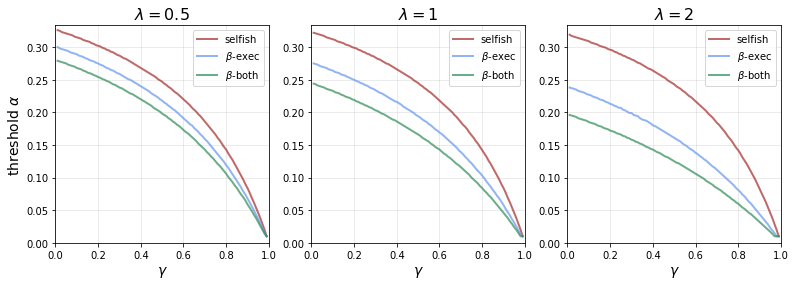

In [312]:
f, axarr = plt.subplots(ncols=3, figsize=(13,4))

for i in range(3):
    axarr[i].plot(gammas, selfishRes[i], color='brown', linewidth=2, alpha=0.7, label='selfish')
    axarr[i].plot(gammas, execRes[i], color='cornflowerblue', linewidth=2, alpha=0.7, label=r'$\beta$-exec')
    axarr[i].plot(gammas, fusionRes[i], color='seagreen', linewidth=2, alpha=0.7, label=r'$\beta$-both')
    
for ax in axarr:
    ax.legend()
    ax.grid(alpha=0.3)
    ax.set_xlabel(r'$\gamma$', size=14)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1/3)
axarr[0].set_ylabel(r'threshold $\alpha$', size=14)

axarr[0].set_title(r'$\lambda=0.5$', size=16)
axarr[1].set_title(r'$\lambda=1$', size=16)
axarr[2].set_title(r'$\lambda=2$', size=16)

# plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')

plt.show()

In [26]:
# hand coded
a, g = sp.symbols('alpha gamma')
expr = a * (2-a + (2-a)/(1-a) + (1-a)**2*g/aq + a**2 / ((1-2*a)*(1-a))) \
        / (a * (2-a + (2-a)/(1-a) + (1-a)**2*g/a + a**2 / ((1-2*a)*(1-a))) \
        + ((1-a)/a + (1-a)**2 * (2-g) + a*(1-a)))

simplified_expr = sp.simplify(expr)
print_latex(simplified_expr)

\frac{\alpha \left(2 \alpha^{3} \gamma - 2 \alpha^{3} - 5 \alpha^{2} \gamma + 8 \alpha^{2} + 4 \alpha \gamma - 4 \alpha - \gamma\right)}{\alpha^{3} + \alpha^{2} + \alpha - 1}


In [27]:
## VERIFY W/ CHATGPT
alpha, gamma = sp.symbols('alpha gamma')

# Define the complex expression
numerator = alpha * (
    2 - alpha +
    (2 - alpha) / (1 - alpha) +
    ((1 - alpha)**2 * gamma) / alpha +
    alpha**2 / ((1 - 2*alpha) * (1 - alpha))
)

denominator = numerator + (
    (1 - alpha) / alpha +
    (1 - alpha)**2 * (2 - gamma) +
    alpha * (1 - alpha)
)

# The full expression
expression = numerator / denominator

# Simplify the expression
simplified_expression = sp.simplify(expression)

print_latex(simplified_expression)


\frac{\alpha \left(2 \alpha^{3} \gamma - 2 \alpha^{3} - 5 \alpha^{2} \gamma + 8 \alpha^{2} + 4 \alpha \gamma - 4 \alpha - \gamma\right)}{\alpha^{3} + \alpha^{2} + \alpha - 1}


$$
\left(5\alpha + (1-\alpha)^2\gamma + \frac{2\alpha^2}{1-2\alpha} - 2\alpha^2\right) \cdot \left(\frac{\alpha (1-\alpha)}{1-3\alpha^2} \right)
$$

In [28]:
# hand coded
a, g = sp.symbols('alpha gamma')
expr = (5*a + (1-a)**2 * g + 2*(a**2) / (1-2*a) - 2 * (a**2)) * (a * (1-a) / (1 - 3*(a**2)))

simplified_expr = sp.simplify(expr)
print_latex(simplified_expr)

- \frac{\alpha \left(\alpha - 1\right) \left(2 \alpha^{2} - \left(2 \alpha - 1\right) \left(- 2 \alpha^{2} + 5 \alpha + \gamma \left(\alpha - 1\right)^{2}\right)\right)}{\left(2 \alpha - 1\right) \left(3 \alpha^{2} - 1\right)}


In [29]:
# VERIFY W CHATGPT
# Define the symbols
alpha, gamma = sp.symbols('alpha gamma')

# Define each part of the expression
part1 = 5*alpha + (1 - alpha)**2 * gamma + 2*alpha**2 / (1 - 2*alpha) - 2*alpha**2
part2 = alpha * (1 - alpha) / (1 - 3*alpha**2)

# Multiply the two parts
expression = part1 * part2

# Simplify the expression
simplified_expression = sp.simplify(expression)

print_latex(simplified_expression)

- \frac{\alpha \left(\alpha - 1\right) \left(2 \alpha^{2} - \left(2 \alpha - 1\right) \left(- 2 \alpha^{2} + 5 \alpha + \gamma \left(\alpha - 1\right)^{2}\right)\right)}{\left(2 \alpha - 1\right) \left(3 \alpha^{2} - 1\right)}


In [40]:
# hand coded
a, g = sp.symbols('alpha gamma')
r_f = a * (2-a + (2-a)/(1-a) + (1-a)**2*g/a + a**2 / ((1-2*a)*(1-a))) \
        / (a * (2-a + (2-a)/(1-a) + (1-a)**2*g/a + a**2 / ((1-2*a)*(1-a))) \
        + ((1-a)/a + (1-a)**2 * (2-g) + a*(1-a)))

simpl_r_f = sp.simplify(r_f)
print_latex(simpl_r_f)
print('--')

r_e = (5*a + (1-a)**2 * g + 2*(a**2) / (1-2*a) - 2 * (a**2)) * (a * (1-a) / (1 - 3*(a**2)))
simpl_r_e = sp.simplify(r_e)
print_latex(simpl_r_e)
print('--')

l = sp.symbols('lamb')
r_t = (simpl_r_f + (l * simpl_r_e)) / (l + 1)
simpl_r_t = sp.simplify(r_t)
print_latex(simpl_r_t)

\frac{\alpha \left(2 \alpha^{3} \gamma - 2 \alpha^{3} - 5 \alpha^{2} \gamma + 8 \alpha^{2} + 4 \alpha \gamma - 4 \alpha - \gamma\right)}{\alpha^{3} + \alpha^{2} + \alpha - 1}
--
- \frac{\alpha \left(\alpha - 1\right) \left(2 \alpha^{2} - \left(2 \alpha - 1\right) \left(- 2 \alpha^{2} + 5 \alpha + \gamma \left(\alpha - 1\right)^{2}\right)\right)}{\left(2 \alpha - 1\right) \left(3 \alpha^{2} - 1\right)}
--
\frac{\alpha \left(- lamb \left(\alpha - 1\right) \left(2 \alpha^{2} - \left(2 \alpha - 1\right) \left(- 2 \alpha^{2} + 5 \alpha + \gamma \left(\alpha - 1\right)^{2}\right)\right) \left(\alpha^{3} + \alpha^{2} + \alpha - 1\right) - \left(2 \alpha - 1\right) \left(3 \alpha^{2} - 1\right) \left(- 2 \alpha^{3} \gamma + 2 \alpha^{3} + 5 \alpha^{2} \gamma - 8 \alpha^{2} - 4 \alpha \gamma + 4 \alpha + \gamma\right)\right)}{\left(2 \alpha - 1\right) \left(3 \alpha^{2} - 1\right) \left(lamb + 1\right) \left(\alpha^{3} + \alpha^{2} + \alpha - 1\right)}


In [41]:
print(simpl_r_t)

alpha*(-lamb*(alpha - 1)*(2*alpha**2 - (2*alpha - 1)*(-2*alpha**2 + 5*alpha + gamma*(alpha - 1)**2))*(alpha**3 + alpha**2 + alpha - 1) - (2*alpha - 1)*(3*alpha**2 - 1)*(-2*alpha**3*gamma + 2*alpha**3 + 5*alpha**2*gamma - 8*alpha**2 - 4*alpha*gamma + 4*alpha + gamma))/((2*alpha - 1)*(3*alpha**2 - 1)*(lamb + 1)*(alpha**3 + alpha**2 + alpha - 1))


In [131]:
simpl_r_t.evalf(subs={l:1., a:0.19, g:.5})

0.199357967006905

In [90]:
simpl_r_t.evalf(subs={l:0., a:1/3, g:0.0})

0.333333333333333

In [92]:
simpl_r_t.evalf(subs={l:0., a:0.25, g:0.5})

0.250000000000000

In [93]:
simpl_r_t.evalf(subs={l:0., a:0.3, g:0.25})

0.300000000000000

In [125]:
simpl_r_t.evalf(subs={l:10000., a:0.2076, g:0.0})

0.207664281998124